## Introduction

Segmentation based on RFM (Recency, Frequency, and Monetary) has been in use for over 50 years especially by direct marketers to target a subset of their customers, save mailing costs, and improve profits. RFM is based on three piilars of customer attributes: Recency of purchase, Frequency of purchase, and Monetary value of purchase. So, in order to conduct RFM, we need to know - 
 - how recently a customer has purchased (recency)
 - how often they purchase (frequency)
 - how much the customer spends (monetary)

Pareto 80/20 Principle is at the core of RFM model which says, 20% customers contribute to 80% of the total revenue. These 20% represent the high-value, important customers the business would want to protect. Therefore, RFM helps to identify customers who are more likely to respond to promotions by segmenting them into various categories. 

The three behavioral attributes, Recency, Frequency, and Monetary are quite simple, in that they can be easily computed for any database that has purchase history, and are easy to comprehend, yet very powerful in their predictive ability. 

In [1]:
install.packages("readxl")
install.packages("rlang")


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages


In [2]:
library(rlang)
library(dplyr)
library(readxl)
library(httr)

Warning message:
"package 'rlang' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'readxl' was built under R version 3.6.1"

In [3]:
data = read_excel("Online Retail.xlsx")

In [4]:
df=data
glimpse(df)

Observations: 541,909
Variables: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "5363...
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752...
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANT...
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, ...
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 0...
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1...
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850,...
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "...


##### Exploring the content of variables
This dataframe contains 8 variables that correspond to:

 - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. Some of the invoice
   number starts with C (e.g. C581568/C581569/C581569), these are cancellation. 
 - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
 - Description: Product (item) name. Nominal. 
 - Quantity: The quantities of each product (item) per transaction. Numeric. 
 - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
 - UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
 - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
 - Country: Country name. Nominal, the name of the country where each customer resides.

In [5]:
head(df)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


In [6]:
summary(df)  # overall statistic of dataset

  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                    UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 11:27:00   3rd Q

In [7]:
df = df %>% 
  mutate(Quantity = replace(Quantity, Quantity<=0, NA),
         UnitPrice = replace(UnitPrice, UnitPrice<=0, NA))

df = na.omit(df)
summary(df)

  InvoiceNo          StockCode         Description           Quantity       
 Length:397884      Length:397884      Length:397884      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    6.00  
                                                          Mean   :   12.99  
                                                          3rd Qu.:   12.00  
                                                          Max.   :80995.00  
  InvoiceDate                    UnitPrice          CustomerID   
 Min.   :2010-12-01 08:26:00   Min.   :   0.001   Min.   :12346  
 1st Qu.:2011-04-07 11:12:00   1st Qu.:   1.250   1st Qu.:13969  
 Median :2011-07-31 14:39:00   Median :   1.950   Median :15159  
 Mean   :2011-07-10 23:41:23   Mean   :   3.116   Mean   :15294  
 3rd Qu.:2011-10-20 14:33:00   3rd Qu.:   3.750   3rd Qu.:16795  
 Max.   :2011-12-09 12:50:00   Max.   :8142.750   Max.   :18287  

In [8]:
sapply(df, function(x) any(is.na(x))) # checking if NA columns


InvoiceNo   StockCode Description    Quantity InvoiceDate   UnitPrice 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
 CustomerID     Country 
      FALSE       FALSE

In [9]:
glimpse(df)

Observations: 397,884
Variables: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "5363...
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752...
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANT...
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, ...
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 0...
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1...
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850,...
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "...


##### We see here, that observation are down from 541,909 to 397,884 and all the negative values are gone. Here, I wanted to check at the countries from which orders were made.

In [10]:
table(df$Country)


           Australia              Austria              Bahrain 
                1182                  398                   17 
             Belgium               Brazil               Canada 
                2031                   32                  151 
     Channel Islands               Cyprus       Czech Republic 
                 748                  614                   25 
             Denmark                 EIRE   European Community 
                 380                 7236                   60 
             Finland               France              Germany 
                 685                 8341                 9040 
              Greece              Iceland               Israel 
                 145                  182                  248 
               Italy                Japan              Lebanon 
                 758                  321                   45 
           Lithuania                Malta          Netherlands 
                  35                  1

### Hypothesis building 
This is the most crucial step of the whole exercise where we identify all the possible variables that can help segment of this data. We have already discussed that, three requirments for RFM- 
 - how recently a customer has purchased (recency)
 - how often they purchase (frequency)
 - how much the customer spends (monetary)

Considering geographical location may have a link with curtomer cluster, therefore, I will restrict data with maxumum order came from geographical unit United Kingdom.

In [11]:
df = subset(df, Country == "United Kingdom")
length(unique(df$InvoiceNo))
length(unique(df$CustomerID))

[1] 16646

[1] 3920

##### We now have a dataset of 16,646 unique invoices and 3920 unique customers.

To calculate the recency and frequency variables below, it will be necessary to distinguish invoices with purchases from invoices with returns.

To correct the datatypes of required variables, let's do some recoding and convert character variables to factors. 

In [12]:
df$Country = as.factor(df$Country)
df$InvoiceNo = as.factor(df$InvoiceNo)
df$StockCode = as.factor(df$StockCode)
df$CustomerID = as.factor(df$CustomerID)
df$InvoiceDate = as.POSIXct(df$InvoiceDate, format = '%d-%m-%Y %H:%M')

In [13]:
glimpse(df)

Observations: 354,321
Variables: 8
$ InvoiceNo   <fct> 536365, 536365, 536365, 536365, 536365, 536365, 536365,...
$ StockCode   <fct> 85123A, 71053, 84406B, 84029G, 84029E, 22752, 21730, 22...
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANT...
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, ...
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 0...
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1...
$ CustomerID  <fct> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850,...
$ Country     <fct> United Kingdom, United Kingdom, United Kingdom, United ...


###### Observations are down from 397,884 to 354,321 as above. Now, I will generate a calculated column showing total price for the ease of calculation of customers contribution to monetary value. 

In [14]:
df$TotalPrice = df$UnitPrice * df$Quantity
head(df)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30


In [15]:
summary(df)

   InvoiceNo        StockCode      Description           Quantity       
 576339 :   542   85123A :  1947   Length:354321      Min.   :    1.00  
 579196 :   533   85099B :  1464   Class :character   1st Qu.:    2.00  
 580727 :   529   22423  :  1426   Mode  :character   Median :    4.00  
 578270 :   442   84879  :  1333                      Mean   :   12.01  
 573576 :   435   47566  :  1307                      3rd Qu.:   12.00  
 567656 :   421   20725  :  1147                      Max.   :80995.00  
 (Other):351419   (Other):345697                                        
  InvoiceDate                    UnitPrice          CustomerID    
 Min.   :2010-12-01 08:26:00   Min.   :   0.001   17841  :  7847  
 1st Qu.:2011-04-07 11:40:00   1st Qu.:   1.250   14096  :  5111  
 Median :2011-07-31 15:31:00   Median :   1.950   12748  :  4595  
 Mean   :2011-07-11 08:04:09   Mean   :   2.964   14606  :  2700  
 3rd Qu.:2011-10-23 13:49:00   3rd Qu.:   3.750   15311  :  2379  
 Max.   :2011-

Objective here to identify those customers who bought recently (recency is low), are regular customers (high frequency) and have spent good money (monetary is high). These customers might be more important than, say, customers with low frequency and low monetary. There are also those customers in the middle, with moderately high frequency and monetary, but also very high recency. Would there be a way to bring those back? What do they want? Perhaps these customers bought something in the past which is no longer offered or available.


### RFM Calculation

To implement the RFM analysis, we need to further process the data set in by the following steps:

 - To calculate recency here, I have considered the invoice data of last purchase. The last invoice date is 2011–12-09, this is 
   the most recent one. To calculate the other recencies I will subtract each day from the day after.
 - To find how frequent a customer is, a column () was created. Then group by CustomerID and sum the number of () in
 - each group to obtain the total number of occurrences of purchase for a particular customer. 
 - Likewise, to obtain the monetary value of a customer, same group by customer ID and sum the Total Price in each group has 
   been used. 

In [16]:
rfm = df%>%
  group_by(CustomerID) %>%
  summarise(last_purchase=max(InvoiceDate), 
            recency = as.double(difftime("2011-12-10",
                                         as.Date(last_purchase, origin="2010-12-01"),  
                                        units = "day")), 
            frequency = n_distinct(InvoiceNo), 
            monetary = sum(TotalPrice)
            )
head(rfm, n=20) 

CustomerID,last_purchase,recency,frequency,monetary
12346,2011-01-18 10:01:00,325.6666667,1,77183.60
12747,2011-12-07 14:34:00,2.6666667,11,4196.01
12748,2011-12-09 12:20:00,0.6666667,209,33719.73
12749,2011-12-06 09:56:00,3.6666667,5,4090.88
12820,2011-12-06 15:12:00,3.6666667,4,942.34
12821,2011-05-09 15:51:00,214.6666667,1,92.72
12822,2011-09-30 10:04:00,70.6666667,2,948.88
12823,2011-09-26 07:35:00,74.6666667,5,1759.50
12824,2011-10-11 12:49:00,59.6666667,1,397.12
12826,2011-12-07 10:25:00,2.6666667,7,1474.72


In [17]:
glimpse(rfm)

Observations: 3,920
Variables: 5
$ CustomerID    <fct> 12346, 12747, 12748, 12749, 12820, 12821, 12822, 1282...
$ last_purchase <dttm> 2011-01-18 10:01:00, 2011-12-07 14:34:00, 2011-12-09...
$ recency       <dbl> 325.6666667, 2.6666667, 0.6666667, 3.6666667, 3.66666...
$ frequency     <int> 1, 11, 209, 5, 4, 1, 2, 5, 1, 7, 3, 6, 2, 6, 1, 2, 1,...
$ monetary      <dbl> 77183.60, 4196.01, 33719.73, 4090.88, 942.34, 92.72, ...


##### Data visualisation
Checking if customers purchasing more recently are more profitable in nature

In [18]:
library(ggplot2)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


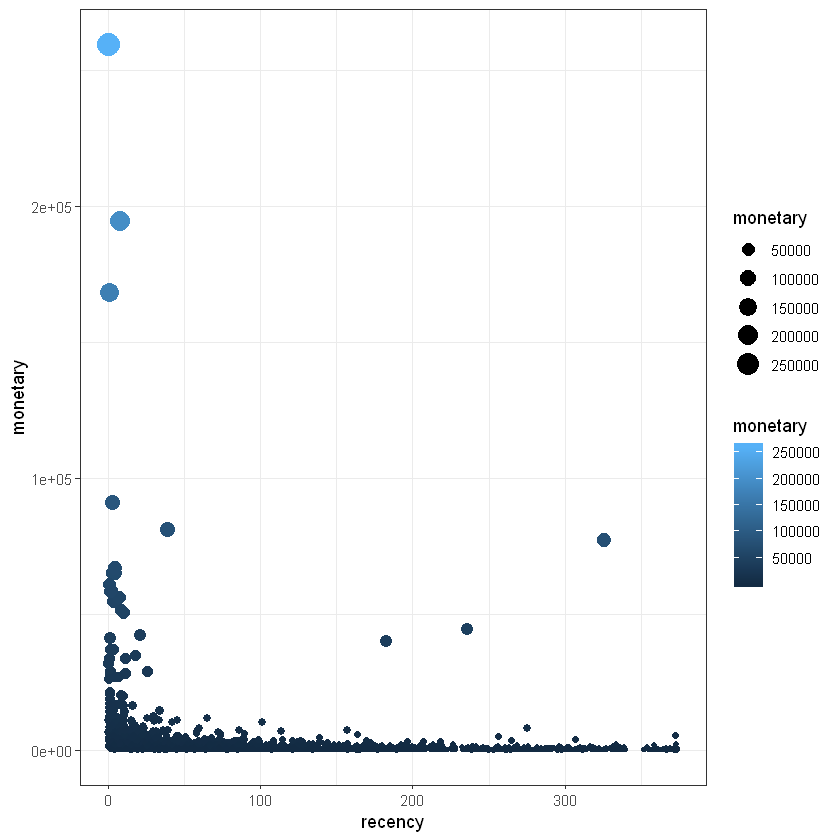

In [19]:
rfm %>% 
  ggplot(aes(x=recency, y=monetary, size=monetary, color=monetary)) + 
  geom_point(position = "jitter")+ theme_bw()

In [20]:
rfm2 = rfm %>% 
        mutate(one_time = ifelse(frequency==1, "One-timer","More than once"), 
               avg_per_purchase = monetary/frequency) %>%
        group_by(one_time)

head(rfm2)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase
12346,2011-01-18 10:01:00,325.6666667,1,77183.60,One-timer,77183.6000
12747,2011-12-07 14:34:00,2.6666667,11,4196.01,More than once,381.4555
12748,2011-12-09 12:20:00,0.6666667,209,33719.73,More than once,161.3384
12749,2011-12-06 09:56:00,3.6666667,5,4090.88,More than once,818.1760
12820,2011-12-06 15:12:00,3.6666667,4,942.34,More than once,235.5850
12821,2011-05-09 15:51:00,214.6666667,1,92.72,One-timer,92.7200


In [21]:
tail(rfm2)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase
18278,2011-09-27 11:58:00,73.666667,1,173.90,One-timer,173.9000
18280,2011-03-07 09:52:00,277.666667,1,180.60,One-timer,180.6000
18281,2011-06-12 10:53:00,180.666667,1,80.82,One-timer,80.8200
18282,2011-12-02 11:43:00,7.666667,2,178.05,More than once,89.0250
18283,2011-12-06 12:02:00,3.666667,16,2094.88,More than once,130.9300
18287,2011-10-28 09:29:00,42.666667,3,1837.28,More than once,612.4267


##### Further visual investigation - what is the distribution of money spent between one-time purchase and the rest?

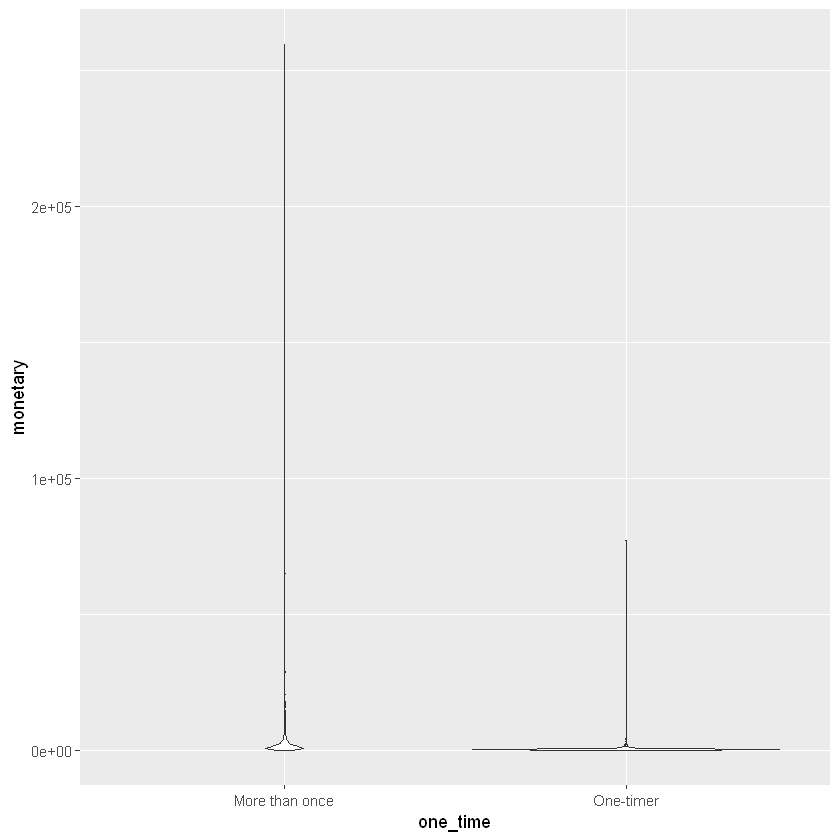

In [22]:
rfm2 %>% ggplot(aes(x=one_time, y=monetary))+geom_violin()

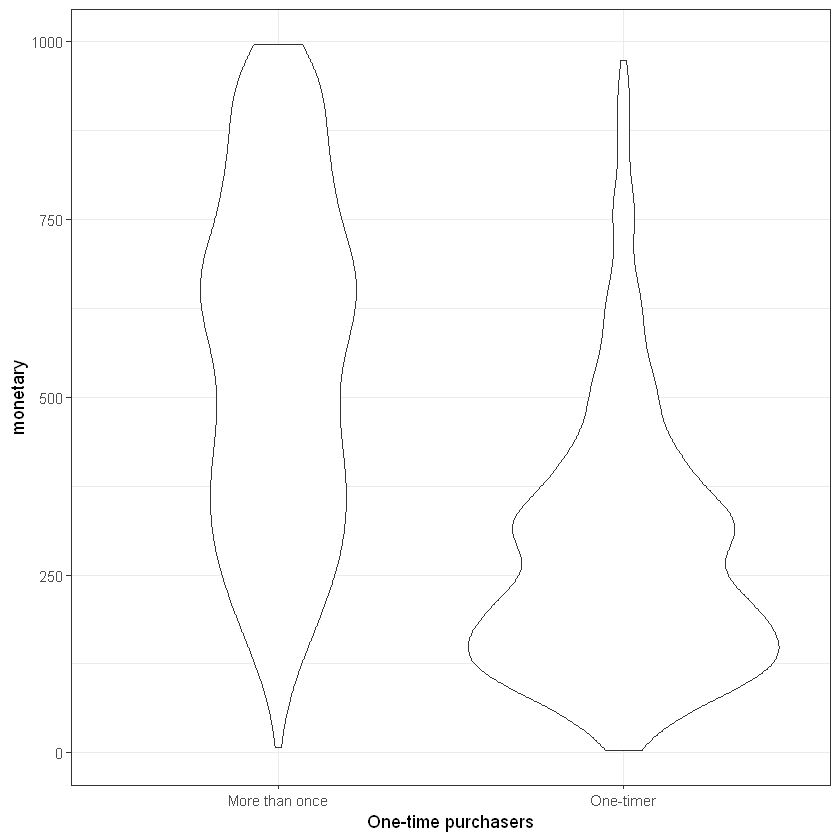

In [23]:
rfm2 %>% 
  filter(monetary<1000)%>%
  ggplot(aes(x=one_time, y=monetary))+geom_violin()+
  xlab("One-time purchasers")+theme_bw()

In [77]:
head(rfm2)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase
12346,2011-01-18 10:01:00,325.6666667,1,77183.60,One-timer,77183.6000
12747,2011-12-07 14:34:00,2.6666667,11,4196.01,More than once,381.4555
12748,2011-12-09 12:20:00,0.6666667,209,33719.73,More than once,161.3384
12749,2011-12-06 09:56:00,3.6666667,5,4090.88,More than once,818.1760
12820,2011-12-06 15:12:00,3.6666667,4,942.34,More than once,235.5850
12821,2011-05-09 15:51:00,214.6666667,1,92.72,One-timer,92.7200


In [27]:
#  Creation of R,F,M rank
rfm2$R = cut(rfm2$recency,5,labels=F) 
rfm2$F = cut(rfm2$frequency,5,labels=F) 
rfm2$M = cut(rfm2$monetary,5,labels=F) 

In [28]:
# Review top 20
rfm3 = rfm2[with(rfm2, order(-R, -F, -M)),]
head(rfm3, n=15)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M
12346,2011-01-18 10:01:00,325.6667,1,77183.60,One-timer,77183.600,5,1,2
12829,2011-01-07 11:13:00,336.6667,2,293.00,More than once,146.500,5,1,1
12855,2010-12-02 09:37:00,372.6667,1,38.10,One-timer,38.100,5,1,1
12872,2011-01-17 10:52:00,326.6667,2,599.97,More than once,299.985,5,1,1
12929,2011-02-01 12:08:00,311.6667,1,117.85,One-timer,117.850,5,1,1
12956,2011-02-06 16:08:00,306.6667,1,108.07,One-timer,108.070,5,1,1
12967,2010-12-16 19:10:00,358.6667,2,1660.90,More than once,830.450,5,1,1
13002,2011-01-25 15:18:00,318.6667,1,120.95,One-timer,120.950,5,1,1
13008,2011-01-20 14:24:00,323.6667,1,229.47,One-timer,229.470,5,1,1
13011,2010-12-02 17:22:00,372.6667,1,50.55,One-timer,50.550,5,1,1


In [29]:
tail(rfm3)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M
18276,2011-10-27 10:54:00,43.666667,1,335.86,One-timer,335.8600,1,1,1
18277,2011-10-12 15:22:00,58.666667,1,110.38,One-timer,110.3800,1,1,1
18278,2011-09-27 11:58:00,73.666667,1,173.90,One-timer,173.9000,1,1,1
18282,2011-12-02 11:43:00,7.666667,2,178.05,More than once,89.0250,1,1,1
18283,2011-12-06 12:02:00,3.666667,16,2094.88,More than once,130.9300,1,1,1
18287,2011-10-28 09:29:00,42.666667,3,1837.28,More than once,612.4267,1,1,1


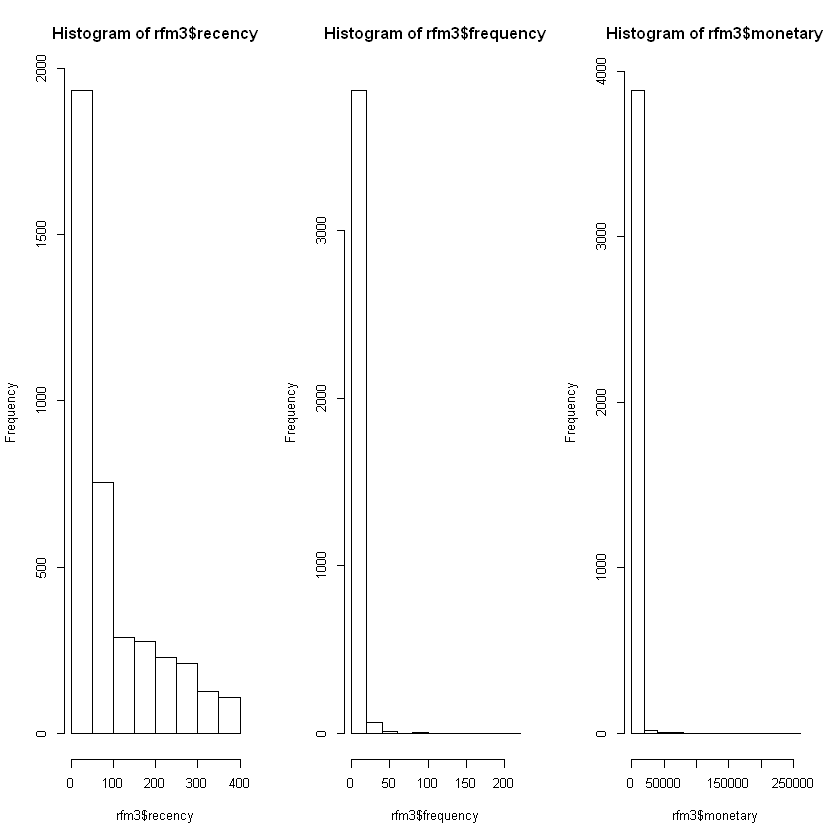

In [30]:
par(mfrow = c(1,3))
hist(rfm3$recency)
hist(rfm3$frequency)
hist(rfm3$monetary)

In [31]:
# Analysis
groupRFM = count(rfm3, R, F, M)
groupRFM = rfm3$R*100 + rfm3$F*10 + rfm3$M
rfm3 = data.frame(rfm3,groupRFM)
head(rfm3)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M,groupRFM
12346,2011-01-18 10:01:00,325.6667,1,77183.60,One-timer,77183.600,5,1,2,512
12829,2011-01-07 11:13:00,336.6667,2,293.00,More than once,146.500,5,1,1,511
12855,2010-12-02 09:37:00,372.6667,1,38.10,One-timer,38.100,5,1,1,511
12872,2011-01-17 10:52:00,326.6667,2,599.97,More than once,299.985,5,1,1,511
12929,2011-02-01 12:08:00,311.6667,1,117.85,One-timer,117.850,5,1,1,511
12956,2011-02-06 16:08:00,306.6667,1,108.07,One-timer,108.070,5,1,1,511


In [32]:
#Table of RFM score and the amount of customers that belong to each.
rfm3$score = rowSums(rfm3[, c(8:10)])
head(rfm3, n=10)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M,groupRFM,score
12346,2011-01-18 10:01:00,325.6667,1,77183.60,One-timer,77183.600,5,1,2,512,8
12829,2011-01-07 11:13:00,336.6667,2,293.00,More than once,146.500,5,1,1,511,7
12855,2010-12-02 09:37:00,372.6667,1,38.10,One-timer,38.100,5,1,1,511,7
12872,2011-01-17 10:52:00,326.6667,2,599.97,More than once,299.985,5,1,1,511,7
12929,2011-02-01 12:08:00,311.6667,1,117.85,One-timer,117.850,5,1,1,511,7
12956,2011-02-06 16:08:00,306.6667,1,108.07,One-timer,108.070,5,1,1,511,7
12967,2010-12-16 19:10:00,358.6667,2,1660.90,More than once,830.450,5,1,1,511,7
13002,2011-01-25 15:18:00,318.6667,1,120.95,One-timer,120.950,5,1,1,511,7
13008,2011-01-20 14:24:00,323.6667,1,229.47,One-timer,229.470,5,1,1,511,7
13011,2010-12-02 17:22:00,372.6667,1,50.55,One-timer,50.550,5,1,1,511,7


In [33]:
countRFM = count(rfm3, score)
countRFM

score,n
3,2405
4,557
5,394
6,326
7,236
8,2


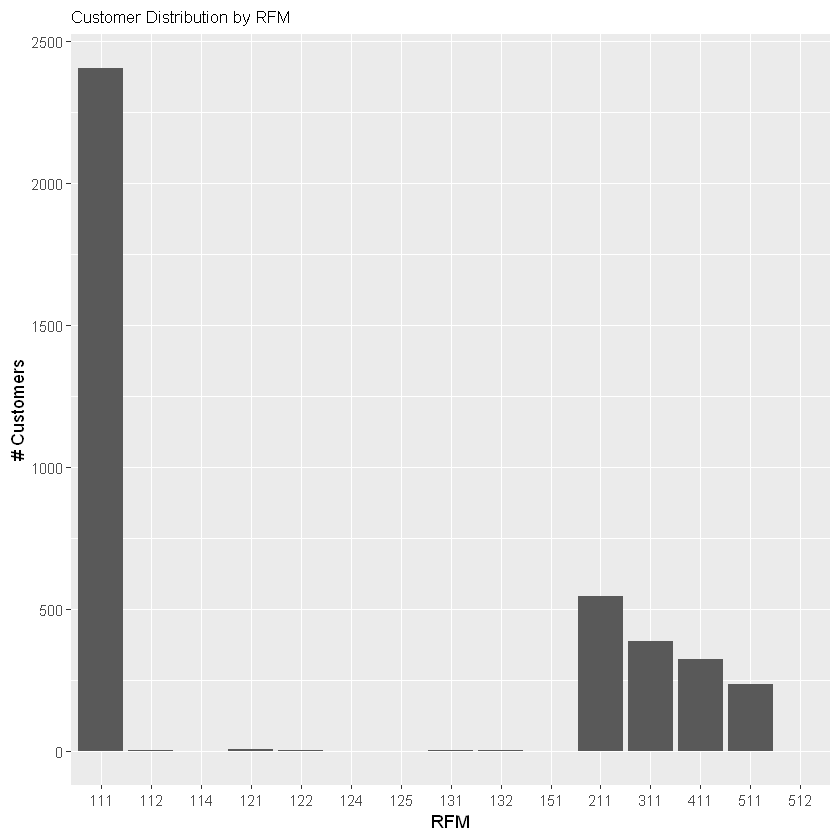

In [34]:
# Plot
ggplot(rfm3, aes(factor(groupRFM))) + geom_bar() +
  ggtitle('Customer Distribution by RFM') +
  labs(x="RFM",y="# Customers") + 
  theme(plot.title = element_text(size=10, hjust=0)) +
  theme(axis.title = element_text())

#### RFM Score based on the quartiles
Recency Score
 - Recency = 4 (ordered in the last 1-7 days)
 - Recency = 3 (ordered in the last 8-14 days)
 - Recency = 2 (ordered in the last 15-30 days)
 - Recency = 1 (ordered more than 31 days ago)

Frequency Score is based on quartiles.
 - Frequency = 4 (more then top 25% orders)
 - Frequency = 3 (quartile 3)
 - Frequency = 2 (quartile 2)
 - Frequency = 1 (1 order)

Monetary Score is based on quartiles.
 - Monetary = 4 (quartile 4)
 - Monetary = 3 (quartile 3)
 - Monetary = 2 (quartile 2)
 - Monetary = 1 (quartile 1)

In [37]:
summary(rfm3$recency)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.6667  17.6667  50.6667  92.4088 142.6667 373.6667 

In [38]:
#Scoring
#R_score
rfm3$segment_recency = NA
rfm3$segment_recency[which(rfm3$recency > 142.66)] = "Inactive"
rfm3$segment_recency[which(rfm3$recency>50.66 & rfm3$recency<=142.66) ]<-'Temporary idle'
rfm3$segment_recency[which(rfm3$recency>17.66 & rfm3$recency<=50.66) ]<-'Frequent'
rfm3$segment_recency[which(rfm3$recency<=17.66)]<-'Highly Active'
rfm3_recency = rfm3
head(rfm3_recency)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M,groupRFM,score,segment_recency
12346,2011-01-18 10:01:00,325.6667,1,77183.60,One-timer,77183.600,5,1,2,512,8,Inactive
12829,2011-01-07 11:13:00,336.6667,2,293.00,More than once,146.500,5,1,1,511,7,Inactive
12855,2010-12-02 09:37:00,372.6667,1,38.10,One-timer,38.100,5,1,1,511,7,Inactive
12872,2011-01-17 10:52:00,326.6667,2,599.97,More than once,299.985,5,1,1,511,7,Inactive
12929,2011-02-01 12:08:00,311.6667,1,117.85,One-timer,117.850,5,1,1,511,7,Inactive
12956,2011-02-06 16:08:00,306.6667,1,108.07,One-timer,108.070,5,1,1,511,7,Inactive


In [39]:
#rfm3$segment_recency <- NA
#rfm3$segment_recency[which(rfm3$recency > 50/2)] = "Inactive"
#rfm3$segment_recency[which(rfm3$recency <= 50/2 & rfm3$recency > 50/4)] = "Temporary Idle"
#rfm3$segment_recency[which(rfm3$recency <= 50/4)] = "Active"
#rfm3_recency = rfm3
#head(rfm3_recency)

In [40]:
tail(rfm3_recency)

,CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M,groupRFM,score,segment_recency
3915,18276,2011-10-27 10:54:00,43.666667,1,335.86,One-timer,335.8600,1,1,1,111,3,Frequent
3916,18277,2011-10-12 15:22:00,58.666667,1,110.38,One-timer,110.3800,1,1,1,111,3,Temporary idle
3917,18278,2011-09-27 11:58:00,73.666667,1,173.90,One-timer,173.9000,1,1,1,111,3,Temporary idle
3918,18282,2011-12-02 11:43:00,7.666667,2,178.05,More than once,89.0250,1,1,1,111,3,Highly Active
3919,18283,2011-12-06 12:02:00,3.666667,16,2094.88,More than once,130.9300,1,1,1,111,3,Highly Active
3920,18287,2011-10-28 09:29:00,42.666667,3,1837.28,More than once,612.4267,1,1,1,111,3,Frequent


In [41]:
customerSegmentationR = count(rfm3, segment_recency)
customerSegmentationR

segment_recency,n
Frequent,997
Highly Active,935
Inactive,983
Temporary idle,1005


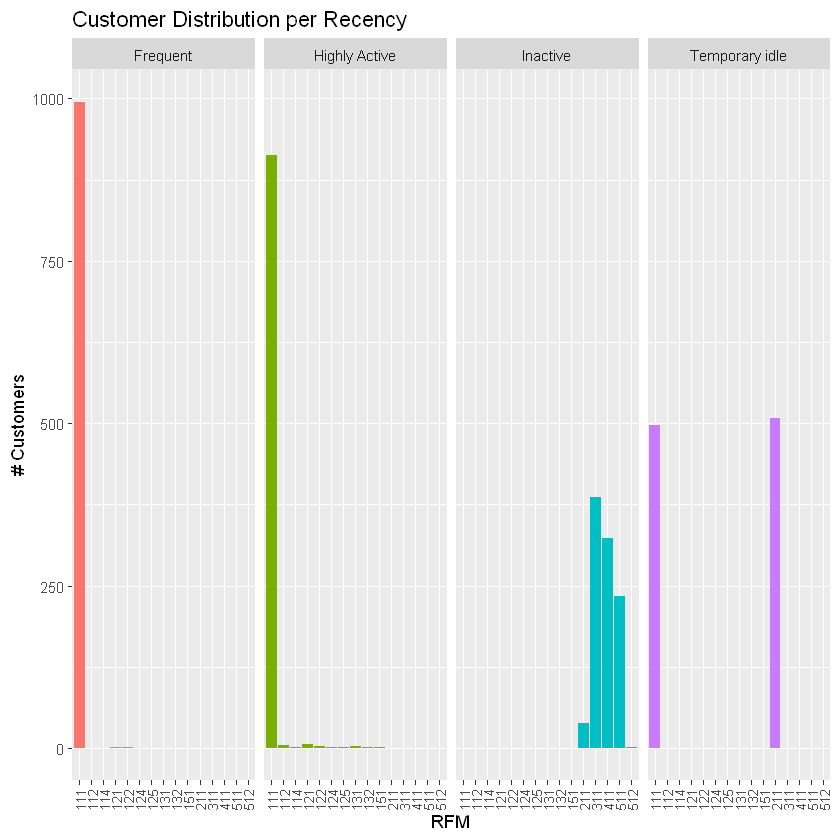

In [42]:
ggplot(rfm3, aes(factor(groupRFM),fill =factor(segment_recency))) + geom_bar() +
  labs(x="RFM",y="# Customers", title="Customer Distribution per Recency") + 
  theme(axis.text.x  = element_text(angle=90,vjust=0.5,size=8)) + 
  facet_grid(. ~ segment_recency) + theme(legend.position="none")

##### Freqency to segment our customers

In [43]:
summary(rfm3$frequency)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   4.246   5.000 209.000 

In [44]:
max(df$InvoiceDate)-min(df$InvoiceDate)

Time difference of 373.1826 days

In [45]:
#F_score
rfm3$segment_frequency = NA
rfm3$segment_frequency[which(rfm3$frequency<1)]<-"Potential"
rfm3$segment_frequency[which(rfm3$frequency>=1 & rfm3$frequency<2)]<-'C. Returning customers'
rfm3$segment_frequency[which(rfm3$frequency>=2 & rfm3$frequency<5) ]<-'B. Regulars'
rfm3$segment_frequency[which(rfm3$frequency>=5)]<-'A. Stellar customer'
rfm3_frequency = rfm3
head(rfm3_frequency, n=10)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M,groupRFM,score,segment_recency,segment_frequency
12346,2011-01-18 10:01:00,325.6667,1,77183.60,One-timer,77183.600,5,1,2,512,8,Inactive,C. Returning customers
12829,2011-01-07 11:13:00,336.6667,2,293.00,More than once,146.500,5,1,1,511,7,Inactive,B. Regulars
12855,2010-12-02 09:37:00,372.6667,1,38.10,One-timer,38.100,5,1,1,511,7,Inactive,C. Returning customers
12872,2011-01-17 10:52:00,326.6667,2,599.97,More than once,299.985,5,1,1,511,7,Inactive,B. Regulars
12929,2011-02-01 12:08:00,311.6667,1,117.85,One-timer,117.850,5,1,1,511,7,Inactive,C. Returning customers
12956,2011-02-06 16:08:00,306.6667,1,108.07,One-timer,108.070,5,1,1,511,7,Inactive,C. Returning customers
12967,2010-12-16 19:10:00,358.6667,2,1660.90,More than once,830.450,5,1,1,511,7,Inactive,B. Regulars
13002,2011-01-25 15:18:00,318.6667,1,120.95,One-timer,120.950,5,1,1,511,7,Inactive,C. Returning customers
13008,2011-01-20 14:24:00,323.6667,1,229.47,One-timer,229.470,5,1,1,511,7,Inactive,C. Returning customers
13011,2010-12-02 17:22:00,372.6667,1,50.55,One-timer,50.550,5,1,1,511,7,Inactive,C. Returning customers


In [47]:
customerSegmentationF = count(rfm3, segment_frequency)
customerSegmentationF

segment_frequency,n
A. Stellar customer,1007
B. Regulars,1563
C. Returning customers,1350


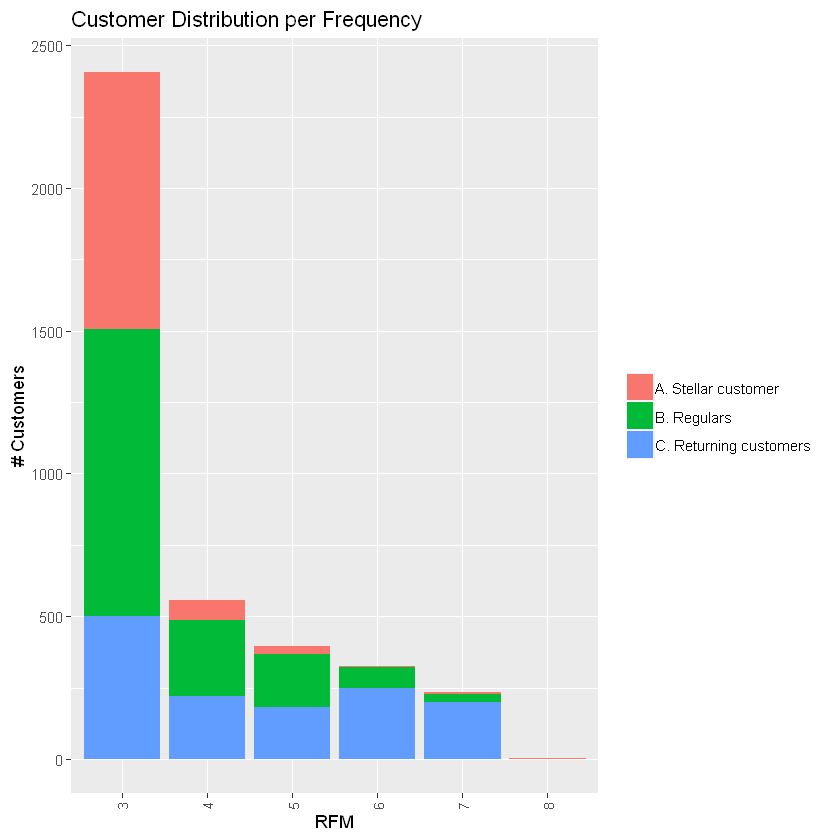

In [48]:
ggplot(rfm3, aes(factor(score),fill =factor(segment_frequency))) +   geom_bar() +
  labs(x="RFM",y="# Customers",title="Customer Distribution per Frequency") +
  theme(axis.text.x  = element_text(angle=90,vjust=0.5,size=8)) + 
  theme(legend.title=element_blank())


##### Monetary Statistics to segment.

In [49]:
summary(rfm3$monetary)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     3.75    300.28    652.28   1864.39   1576.59 259657.30 

In [52]:
rfm3$segment_monetary = NA
rfm3$segment_monetary[which(rfm3$monetary < 300.20)] = "Worst"
rfm3$segment_monetary[which(rfm3$monetary >= 300.28 & rfm3$monetary < 652.28)] = "Top - 75%"
rfm3$segment_monetary[which(rfm3$monetary >= 652.28 & rfm3$monetary < 1576.59)] = "Top - 50%"
rfm3$segment_monetary[which(rfm3$monetary >= 1576.59)] = "Best"
rfm_monetary = rfm3
head(rfm_monetary, n=10)

CustomerID,last_purchase,recency,frequency,monetary,one_time,avg_per_purchase,R,F,M,groupRFM,score,segment_recency,segment_frequency,segment_monetary
12346,2011-01-18 10:01:00,325.6667,1,77183.60,One-timer,77183.600,5,1,2,512,8,Inactive,C. Returning customers,Best
12829,2011-01-07 11:13:00,336.6667,2,293.00,More than once,146.500,5,1,1,511,7,Inactive,B. Regulars,Worst
12855,2010-12-02 09:37:00,372.6667,1,38.10,One-timer,38.100,5,1,1,511,7,Inactive,C. Returning customers,Worst
12872,2011-01-17 10:52:00,326.6667,2,599.97,More than once,299.985,5,1,1,511,7,Inactive,B. Regulars,Top - 75%
12929,2011-02-01 12:08:00,311.6667,1,117.85,One-timer,117.850,5,1,1,511,7,Inactive,C. Returning customers,Worst
12956,2011-02-06 16:08:00,306.6667,1,108.07,One-timer,108.070,5,1,1,511,7,Inactive,C. Returning customers,Worst
12967,2010-12-16 19:10:00,358.6667,2,1660.90,More than once,830.450,5,1,1,511,7,Inactive,B. Regulars,Best
13002,2011-01-25 15:18:00,318.6667,1,120.95,One-timer,120.950,5,1,1,511,7,Inactive,C. Returning customers,Worst
13008,2011-01-20 14:24:00,323.6667,1,229.47,One-timer,229.470,5,1,1,511,7,Inactive,C. Returning customers,Worst
13011,2010-12-02 17:22:00,372.6667,1,50.55,One-timer,50.550,5,1,1,511,7,Inactive,C. Returning customers,Worst


In [53]:
customerSegmentationM = count(rfm3, segment_monetary)
customerSegmentationM

segment_monetary,n
Best,980
Top - 50%,980
Top - 75%,980
Worst,980


In terms of monetary value a;; 4 categories are equally distributed indicating 2 or maximum 3 clusters for this dataset. 

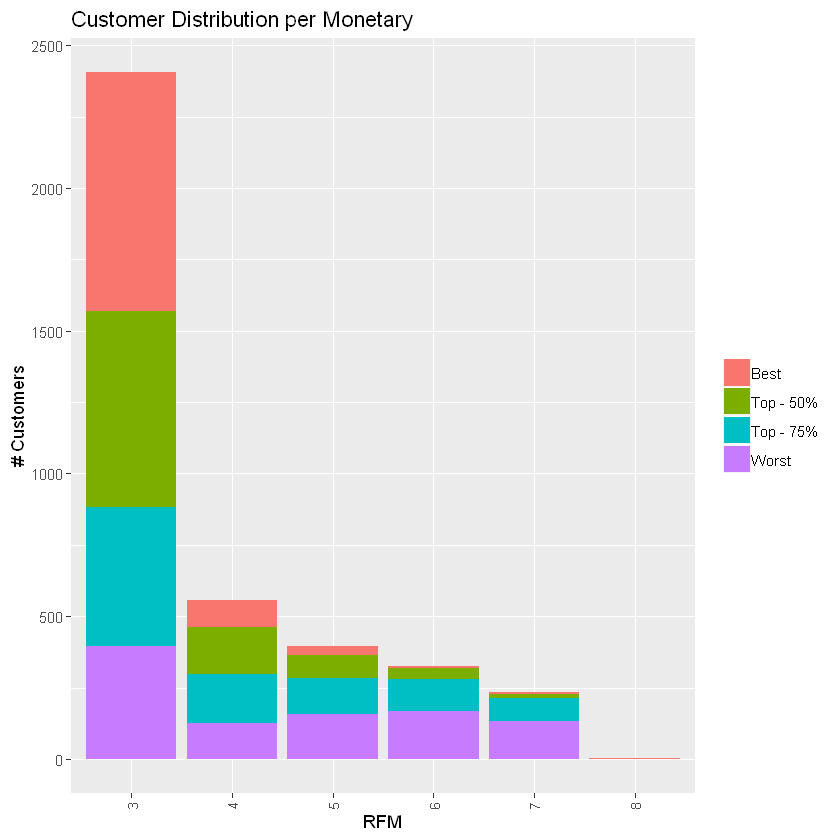

In [54]:
ggplot(rfm3, aes(factor(score),fill =factor(segment_monetary))) + geom_bar() +
  labs(x="RFM",y="# Customers",title="Customer Distribution per Monetary") +
  theme(axis.text.x  = element_text(angle=90,vjust=0.5,size=8)) + 
  theme(legend.title=element_blank())

In [55]:
write.csv(rfm3,"RFM.csv")

### Segmentation using k-means clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. It starts with randomly chosen cluster centroids so to find optimal ones. Besides the initialisation, the algorithm is totally deterministic.

To implement the RFM analysis, we need to further process the data set in by the following steps:

 - To calculate recency here, we’ll look into the invoice dates. Since the date of our last invoice was 2011–12–09, we’ll
   consider it as the most recent one. Then, we’ll subtract each day from the day after to calculate the other recencies.
 - To find how frequent a customer is, we create a dummy column 'Count' giving a fixed value of 1. We group by CustomerID
   and sum the number of 'Count'(s) in each group. This will give us the total number of occurrences of purchase for a
   particular customer. Hence, keeping this as Frequency. 
 - To find the monetary value of a customer, we group by customer ID and sum the Total Price in each group. This will give us
   the total money spent on the purchase, for a particular customer. Hence, keeping this as Monetary Value. 

In [56]:
head(rfm)

CustomerID,last_purchase,recency,frequency,monetary
12346,2011-01-18 10:01:00,325.6666667,1,77183.60
12747,2011-12-07 14:34:00,2.6666667,11,4196.01
12748,2011-12-09 12:20:00,0.6666667,209,33719.73
12749,2011-12-06 09:56:00,3.6666667,5,4090.88
12820,2011-12-06 15:12:00,3.6666667,4,942.34
12821,2011-05-09 15:51:00,214.6666667,1,92.72


In [57]:
df1= rfm  # creating another dataframe for this analysis

#### 80/20 Principle
Pareto Principle is at the core of RFM model which says, 20% customers contribute to 80% of your total revenue. These 20% represent the high-value, important customers the business would want to protect.

In [58]:
df1 = df1[order(-df1$monetary),]

# Apply Pareto Principle (80/20 Rule)
pareto.cutoff = 0.8 * sum(df1$monetary)
df1$pareto = ifelse(cumsum(df1$monetary) <= pareto.cutoff, "Top 20%", "Bottom 80%")
df1$pareto = factor(df1$pareto, levels=c("Top 20%", "Bottom 80%"), ordered=TRUE)
levels(df1$pareto)
round(prop.table(table(df1$pareto)), 2)
remove(pareto.cutoff)
df1 = df1[order(df1$CustomerID),] 

[1] "Top 20%"    "Bottom 80%"


   Top 20% Bottom 80% 
      0.27       0.73 

In [59]:
head(df1, n=20)

CustomerID,last_purchase,recency,frequency,monetary,pareto
12346,2011-01-18 10:01:00,325.6666667,1,77183.60,Top 20%
12747,2011-12-07 14:34:00,2.6666667,11,4196.01,Top 20%
12748,2011-12-09 12:20:00,0.6666667,209,33719.73,Top 20%
12749,2011-12-06 09:56:00,3.6666667,5,4090.88,Top 20%
12820,2011-12-06 15:12:00,3.6666667,4,942.34,Bottom 80%
12821,2011-05-09 15:51:00,214.6666667,1,92.72,Bottom 80%
12822,2011-09-30 10:04:00,70.6666667,2,948.88,Bottom 80%
12823,2011-09-26 07:35:00,74.6666667,5,1759.50,Top 20%
12824,2011-10-11 12:49:00,59.6666667,1,397.12,Bottom 80%
12826,2011-12-07 10:25:00,2.6666667,7,1474.72,Top 20%


So,  here by looking at the top customers who produced 80% of annual sales for the year,  I created some simple segments. In this dataset, 73% of the annual sales are produced by the top 27% of customers, so the percentage isn’t quite 20%, but it’s not that far off and it reflects that, comparatively a small number of customers producing the bulk of the business value.

##### Preprocess data

I shall apply k-means clustering which requires continuous variables and works best with relatively normally-distributed, standardised input variables. Data normalisation and standardisation is quite important here; otherwise, input variables with larger variances will tend to have correspondingly greater influence on the results. Below, I used logarithm transform to the three input variables to reduce positive skew and then standardise them.

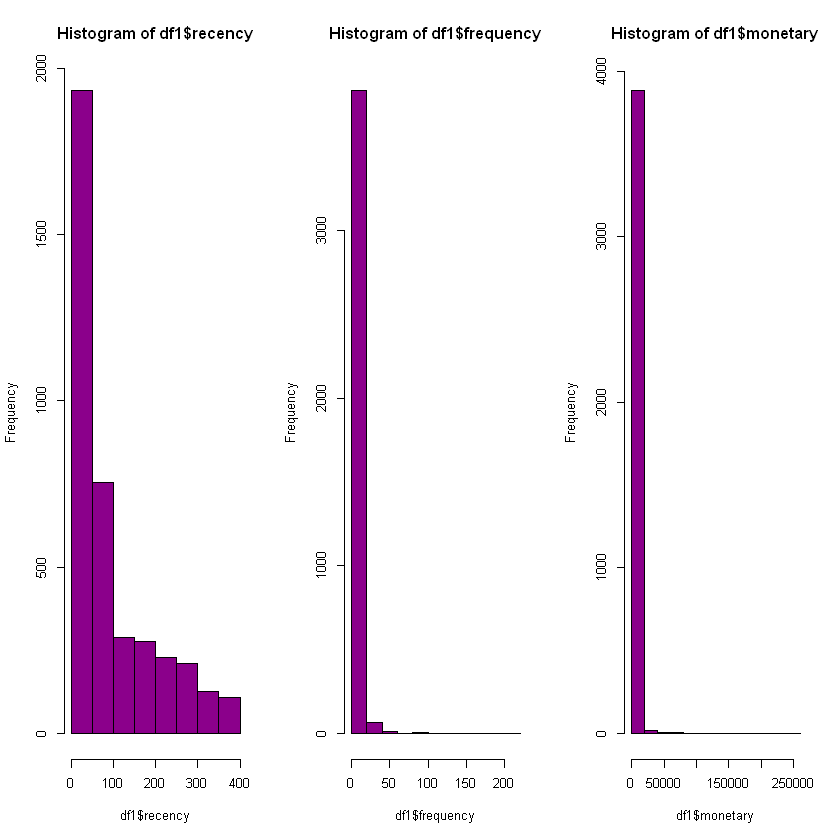

In [60]:
par(mfrow = c(1,3))
hist(df1$recency, col="darkmagenta") # Recency – How recently did the customer purchase?
hist(df1$frequency, col="darkmagenta") # Frequency – How often do they purchase?
hist(df1$monetary, col="darkmagenta") # Monetary Value – How much do they spend?

### Data Normalization (Lognormal)

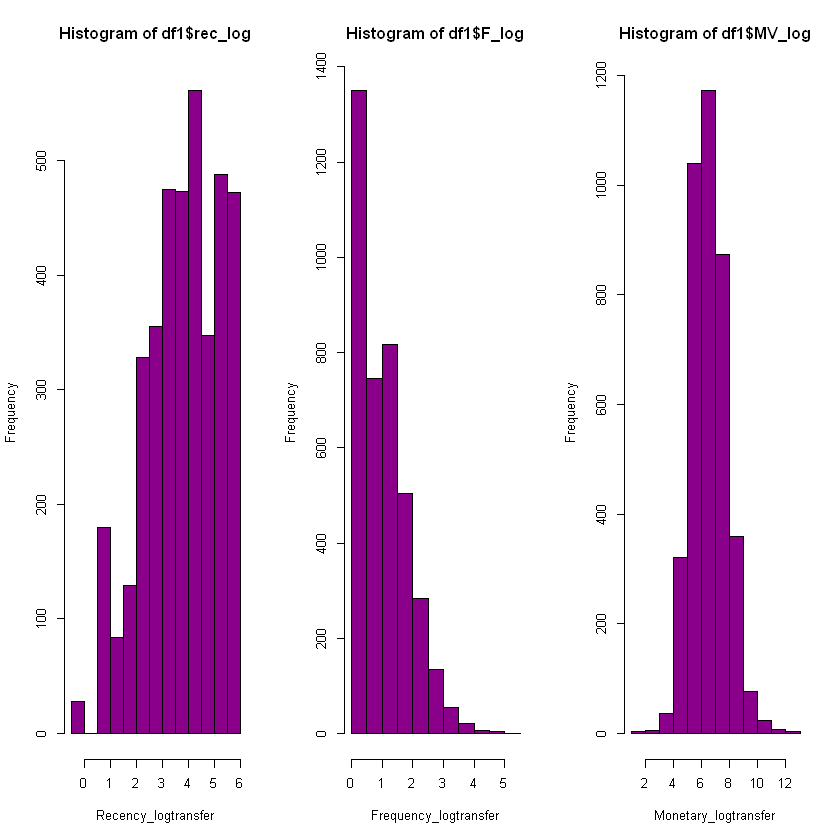

In [61]:
par(mfrow = c(1,3))
df1$rec_log = log(df1$recency)  # using logscale to normalise data distribution
hist(df1$rec_log, xlab='Recency_logtransfer', col="darkmagenta")

df1$F_log = log(df1$frequency)  # using logscale to normalise data distribution
hist(df1$F_log, xlab='Frequency_logtransfer', col="darkmagenta")

# can't take log(0), so add a small value to remove zeros
df1$monetary = df1$monetary + 0.1
df1$MV_log = log(df1$monetary)  # using logscale to normalise data distribution
hist(df1$MV_log, xlab='Monetary_logtransfer', col="darkmagenta")

In [62]:
head(df1, n=20)

CustomerID,last_purchase,recency,frequency,monetary,pareto,rec_log,F_log,MV_log
12346,2011-01-18 10:01:00,325.6666667,1,77183.70,Top 20%,5.7858744,0.0000000,11.253944
12747,2011-12-07 14:34:00,2.6666667,11,4196.11,Top 20%,0.9808293,2.3978953,8.341913
12748,2011-12-09 12:20:00,0.6666667,209,33719.83,Top 20%,-0.4054651,5.3423343,10.425841
12749,2011-12-06 09:56:00,3.6666667,5,4090.98,Top 20%,1.2992830,1.6094379,8.316540
12820,2011-12-06 15:12:00,3.6666667,4,942.44,Bottom 80%,1.2992830,1.3862944,6.848472
12821,2011-05-09 15:51:00,214.6666667,1,92.82,Bottom 80%,5.3690864,0.0000000,4.530662
12822,2011-09-30 10:04:00,70.6666667,2,948.98,Bottom 80%,4.2579740,0.6931472,6.855388
12823,2011-09-26 07:35:00,74.6666667,5,1759.60,Top 20%,4.3130338,1.6094379,7.472842
12824,2011-10-11 12:49:00,59.6666667,1,397.22,Bottom 80%,4.0887735,0.0000000,5.984490
12826,2011-12-07 10:25:00,2.6666667,7,1474.82,Top 20%,0.9808293,1.9459101,7.296291


In [63]:
df2 = df1[,6:9]
head(df2)

pareto,rec_log,F_log,MV_log
Top 20%,5.7858744,0.000000,11.253944
Top 20%,0.9808293,2.397895,8.341913
Top 20%,-0.4054651,5.342334,10.425841
Top 20%,1.2992830,1.609438,8.316540
Bottom 80%,1.2992830,1.386294,6.848472
Bottom 80%,5.3690864,0.000000,4.530662


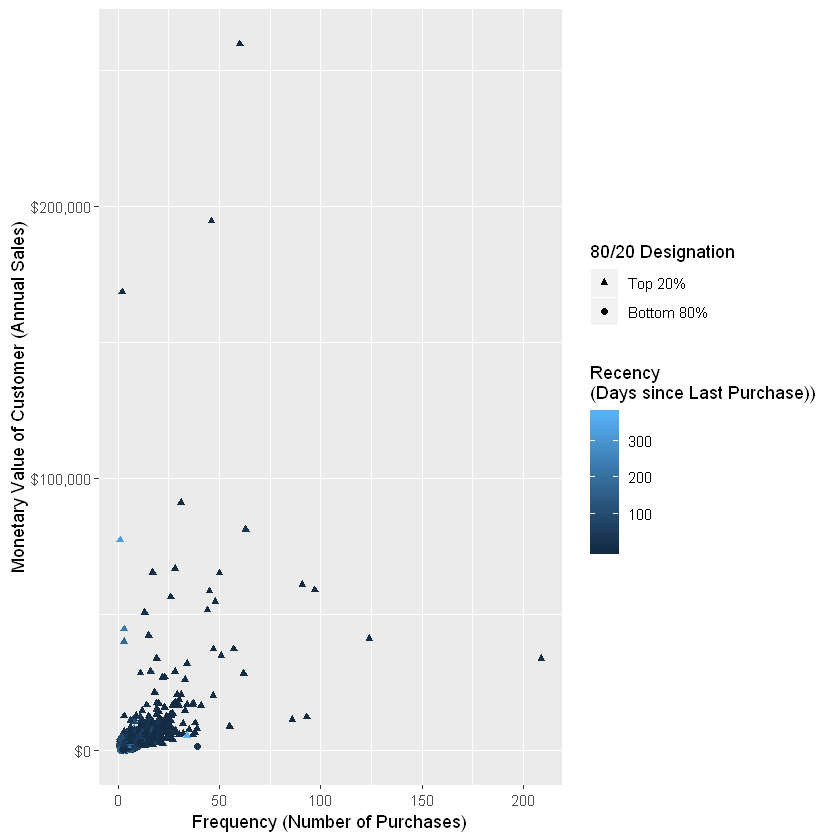

In [64]:
# Original scale
plotA = ggplot(df1, aes(x = frequency, y = monetary))
plotA = plotA + geom_point(aes(colour = recency, shape = pareto))
plotA = plotA + scale_shape_manual(name = "80/20 Designation", values=c(17, 16))
plotA = plotA + scale_colour_gradient(name="Recency\n(Days since Last Purchase))")
plotA = plotA + scale_y_continuous(label=dollar)
plotA = plotA + xlab("Frequency (Number of Purchases)")
plotA = plotA + ylab("Monetary Value of Customer (Annual Sales)")
plotA

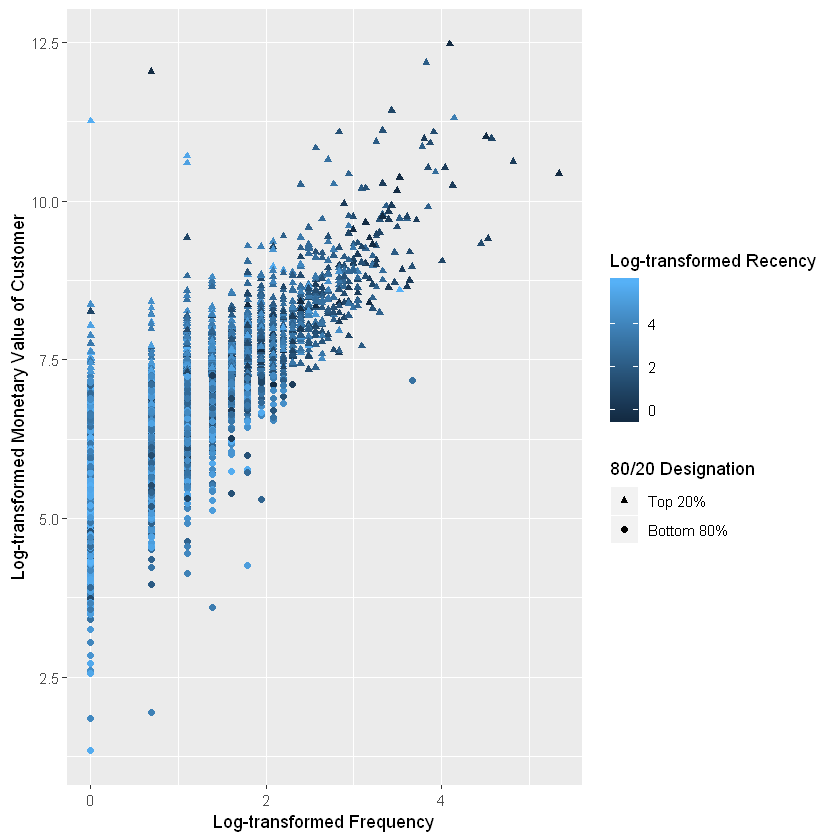

In [65]:
# Log-transformed
plotB = ggplot(df2, aes(x = F_log, y = MV_log))
plotB = plotB + geom_point(aes(colour = rec_log, shape = pareto))
plotB = plotB + scale_shape_manual(name = "80/20 Designation", values=c(17, 16))
plotB = plotB + scale_colour_gradient(name="Log-transformed Recency")
plotB = plotB + xlab("Log-transformed Frequency")
plotB = plotB + ylab("Log-transformed Monetary Value of Customer")
plotB

Here we can see a scattering of high-value, high-frequency customers in the top, right-hand corner of the graph. The dark data points means they’ve purchased recently. In the bottom, left-hand corner of the plot, we can see a couple of low-value, low frequency customers who haven’t purchased anything recently, with a range of values in between.

Importantly, we can see that the data points are fairly continuously-distributed. There really aren’t clear clusters. This means that any cluster groupings we create won’t exactly reflect some true, underlying group membership – they’ll be somewhat arbitrary (albeit reasonable) distinctions that we draw for our own purposes.

### Data Standardization procedure

In [66]:
df3 = scale(df2[, 2:4])
head(df3)

rec_log,F_log,MV_log
1.418512,-1.0501135,3.7781066
-1.973332,1.6130971,1.4424525
-2.951906,4.8833237,3.1139101
-1.748538,0.7374008,1.4221013
-1.748538,0.4895675,0.2446074
1.124304,-1.0501135,-1.6144401


#### K-Means Clustering
K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., clusters), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster.

k-means clustering tends to be sensitive to outliers, such that outliers will sometimes end up being clustered together in their own tiny group. This is often cited as a reason to exclude them from the analysis. Here, the outliers may be the most important customers to understand. In the top, right-hand corner, we have customers who are outliers in terms of being extraordinarily high-value, high-frequency shoppers. These data points are all represented with the triangles shape in the plot and they’re in the top 80/20 category. These are important customers to understand, because they’re the customers wanted. At the other end of the continuum, we have the no-value customers in the bottom, left-hand corner. These customers, too, may be important to model and understand – they’re the customers we want to minimize. I deliberately include these outliers in the analysis.

#### Clustering Algorithm 
So now we get a data frame structure consisting of 3354321 obs. of  3 variables, that we require to make segmentation.
k means a sample example of finding optimal number of clusters in it.

##### K-means Algorithm
The first step when using k-means clustering is to indicate the number of clusters (k) that will be generated in the final solution. The algorithm starts by randomly selecting k objects from the data set to serve as the initial centers for the clusters. The selected objects are also known as cluster means or centroids. Next, each of the remaining objects is assigned to it’s closest centroid, where closest is defined using the Euclidean distance (Eq. 1) between the object and the cluster mean. This step is called “cluster assignment step”. After the assignment step, the algorithm computes the new mean value of each cluster. The term cluster “centroid update” is used to design this step. Now that the centers have been recalculated, every observation is checked again to see if it might be closer to a different cluster. All the objects are reassigned again using the updated cluster means. The cluster assignment and centroid update steps are iteratively repeated until the cluster assignments stop changing (i.e until convergence is achieved). That is, the clusters formed in the current iteration are the same as those obtained in the previous iteration.

###### K-means algorithm can be summarized as follows:
 - Specify the number of clusters (K) to be created (by the analyst)
 - Select randomly k objects from the data set as the initial cluster centers or means
 - Assigns each observation to their closest centroid, based on the Euclidean distance between the object and the centroid
 - For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the
   cluster. The centroid of a Kth cluster is a vector of length p containing the means of all variables for the observations in
   the kth cluster; p is the number of variables.
 - Iteratively minimise the total within sum of square. That is, iterate steps 3 and 4 until the cluster assignments
   stop changing or the maximum number of iterations is reached. By default, the R software uses 10 as the default value for
   the maximum number of iterations

Let us try to create the clusters for this data. As we can observe this data doesnot have a pre-defined class/output type defined and so it becomes necessary to know what will be an optimal number of clusters.Let us choose random value of cluster numbers for now and see how the clusters are created. Let us start with k=3 and check what the results are.
### Clustering Model
Now I have created a new dataset(df3) with only the log transformed values of rec_log, F_log and MV_log so that there exists no bias in the unit of measurement. So three columns are present here storing it in another new dataset. Before doing so, let's do some sanity check. Performing the kmeans() function to cluster the customer segments. Here I set k=3. From our hypothesis, we expect there to be at least 2 and at most 4 groups of customers. Let us apply kmeans for k=3 clusters. I kept the number of iter.max=15 to ensure the algorithm converges and nstart=50 to ensure that atleat 50 random sets are choosen.  

In [67]:
kmm = kmeans(df3,3,nstart = 50,iter.max = 10) 
kmm

K-means clustering with 3 clusters of sizes 1518, 1706, 696

Cluster means:
     rec_log      F_log     MV_log
1 -0.1895881  0.2512911  0.2763956
2  0.6836507 -0.8480687 -0.8052298
3 -1.2622318  1.5306686  1.3709103

Clustering vector:
   [1] 1 3 3 3 1 2 1 1 2 3 1 3 2 3 2 1 2 2 1 2 1 3 1 3 1 1 1 2 1 1 2 2 1 1 2 3 2
  [38] 2 2 3 1 2 2 2 2 3 2 1 2 1 1 2 1 1 2 2 2 2 2 2 3 2 1 3 2 1 3 3 3 2 1 2 3 2
  [75] 3 2 2 1 1 1 2 2 3 1 3 1 1 2 3 1 1 1 2 1 3 3 3 1 1 2 3 2 3 1 3 2 2 2 2 1 3
 [112] 2 2 2 3 1 2 2 3 1 2 3 1 1 1 1 2 1 2 1 3 2 2 3 2 2 2 2 3 3 3 1 1 2 3 3 1 3
 [149] 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 3 1 1 3 2 1 1 2 2 2 2 1 2 1 2 1 3 2 2 2 3 3
 [186] 1 2 3 1 1 2 3 3 2 1 1 3 2 3 3 2 2 3 2 3 2 1 2 1 1 3 1 2 1 1 2 2 1 1 3 2 2
 [223] 1 2 2 1 1 1 3 1 3 1 1 2 2 1 2 1 3 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 2
 [260] 2 3 2 3 3 2 1 2 2 1 1 2 2 1 3 3 1 1 1 1 3 2 1 1 1 2 1 2 1 2 2 1 3 2 2 2 2
 [297] 3 3 1 2 1 1 2 1 2 2 2 2 1 1 2 1 1 1 1 2 2 2 2 3 1 3 3 3 3 2 2 2 2 1 1 2 2
 [334] 1 1 2 2 1 2 1 2 2 2 3 1 2 2 

When we check the (between_SS / total_SS) 63.3%  which is good. This ratio actually accounts for the amount of total sum of squares of the data points which is between the clusters. We want to increase this value and as we increase the number of clusters we see it increasing , but we do not want to overfit the data. So we see that with k=4 in this we will have 4 clusters which completely overfits the data. So the idea is to find such a value of k for which the model is not overfitting and at the same time clusters the data as per the actual distribution. Let us now approach how we will solve this problem of finding the best number of clusters.

##### Elbow Method
The elbow method looks at the percentage of variance explained as a function of the number of clusters. We should choose a number of clusters so that adding another cluster doesn’t give much variance for better modeling of the data. 

##### Compute k-means clustering algorithm for different values of k (1-10)
 - For each k, calculate the total within-cluster sum of square (wss)
 - Plot the elbow curve of wss according to the number of clusters k.
 - The location of elbow in the plot is generally considered as an indicator of the appropriate number of clusters.

[1] 11757.000  5723.611  4312.476  3510.839  3001.024  2569.709  2302.693
 [8]  2114.805  1941.273  1796.116

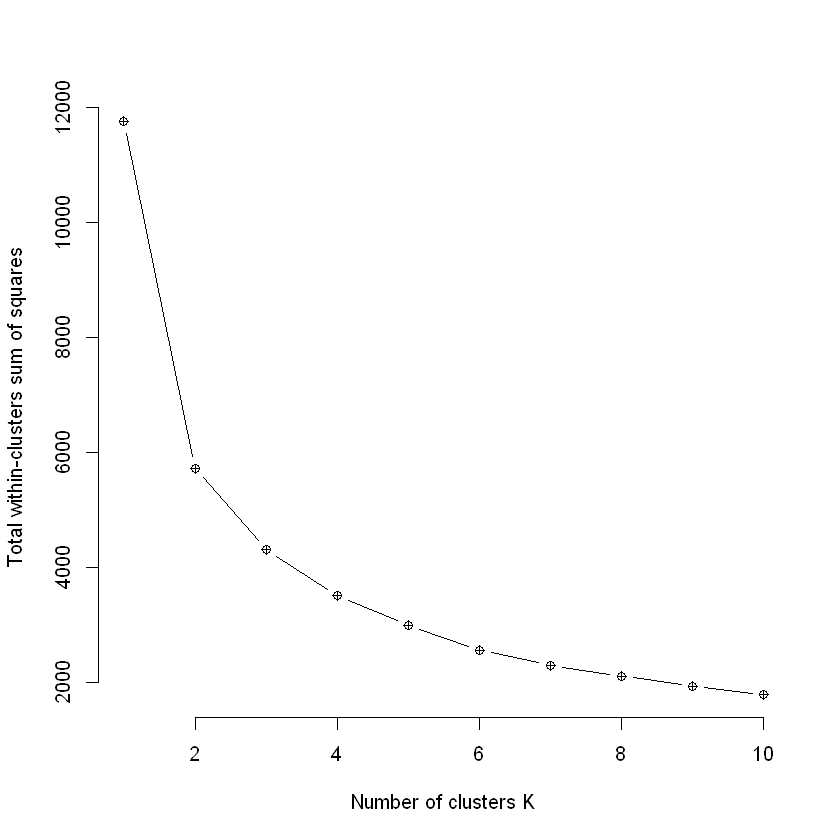

In [68]:
#Elbow Method for finding the optimal number of clusters
set.seed(123)
# Compute and plot wss for k = 2 to k = 15.
k.max = 10
data = df3
wss = sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
wss
plot(1:k.max, wss,
     type="b", pch = 10, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [69]:
kmm$withinss

[1] 1639.394 1570.357 1102.726

In [70]:
kmm$betweenss

[1] 7444.524

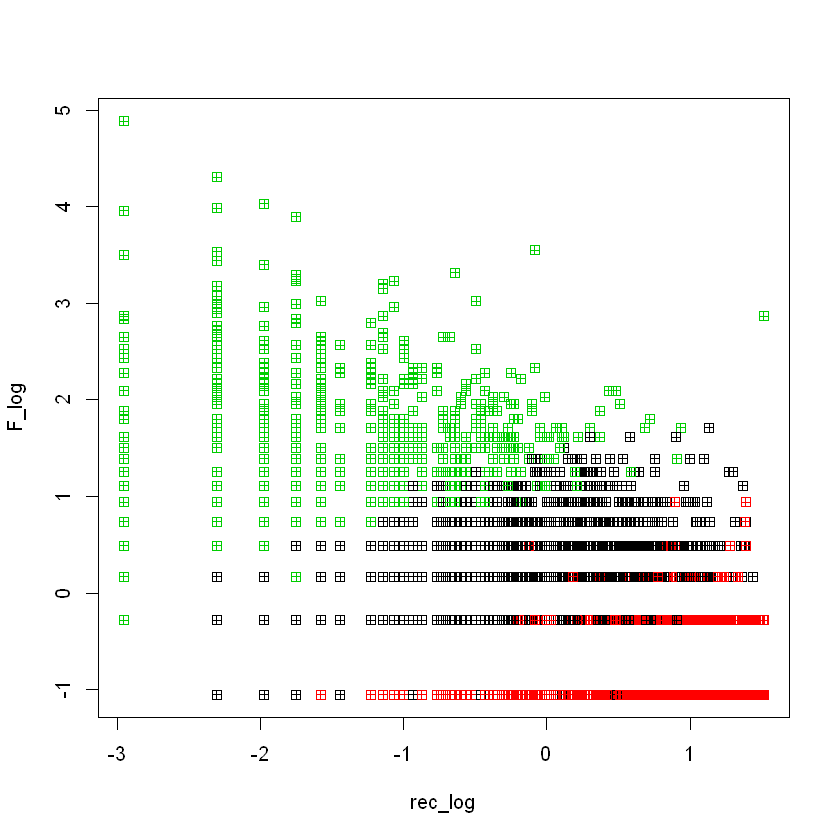

In [71]:
plot(df3, col=kmm$cluster, pch=12)

In [72]:
head(kmm$cluster, n=10)

[1] 1 3 3 3 1 2 1 1 2 3

In [74]:
install.packages('factoextra')
install.packages('NbClust')
install.packages('fpc')
install.packages('clValid')
install.packages('clustertend')
library("cluster")
library("factoextra")
library("magrittr")
library("NbClust")
library("fpc")
library("clValid")
library("clustertend")

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages
package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages
package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages
package 'clustertend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\Rtmp0Saq4I\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 3.6.1"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: 'magrittr'

The following object is masked from 'package:rlang':

    set_names

Warning message:
"package 'fpc' was built under R version 3.6.1"Warning message:
"package 'clValid' was built under R version 3.6.1"

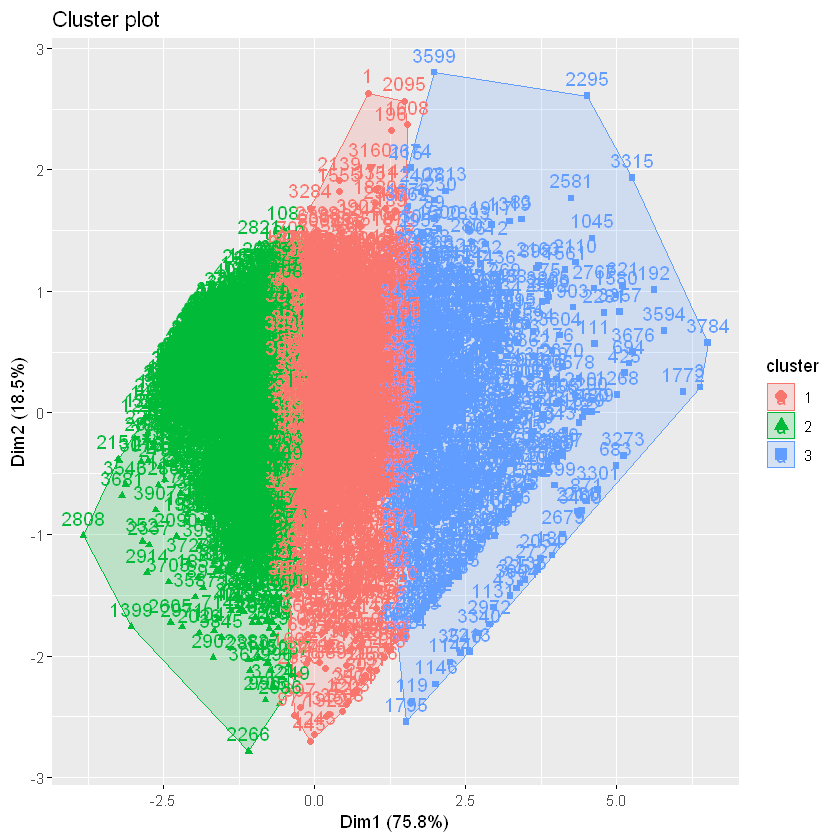

In [75]:
fviz_cluster(kmm, df3)

Above plot clearly shows that each group or cluster separated by colours is homogeneous and each cluster is different from other clusters. 

#### NbClust metrics to determine number of clusters
Uses the silhouette() function to obtain silhouette widths. Silhouette is a technique in clustering that validates the best cluster groups. The silhouette() function from the cluster package allows us to get the average width of silhouettes, which will be used to programmatically determine the optimal cluster size.

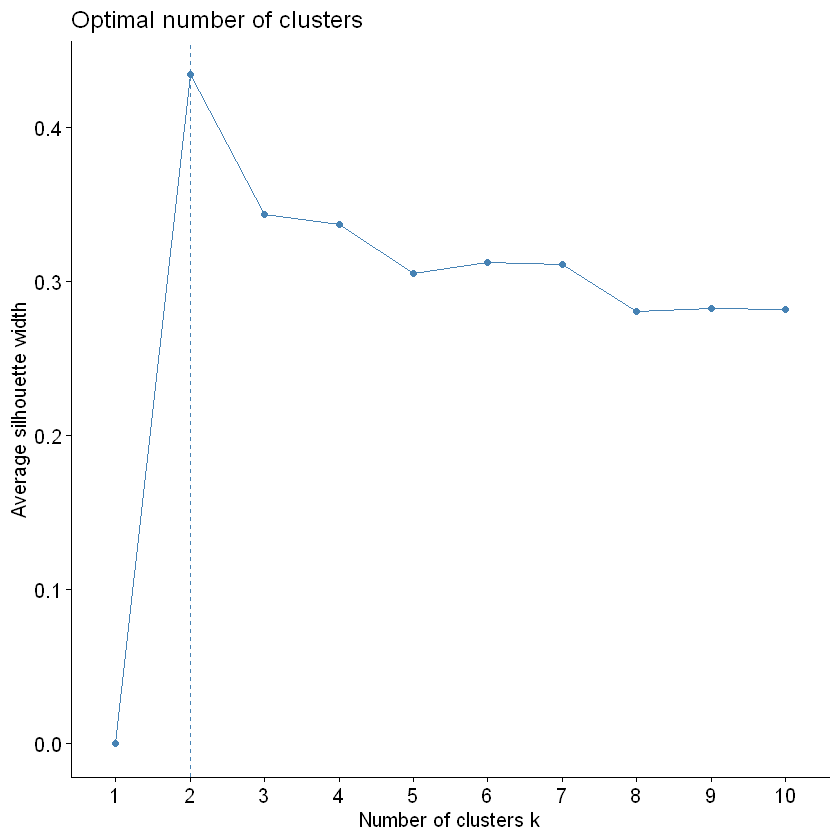

In [76]:
# Alternative to silhouette
fviz_nbclust(df3, kmeans, method = "silhouette")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


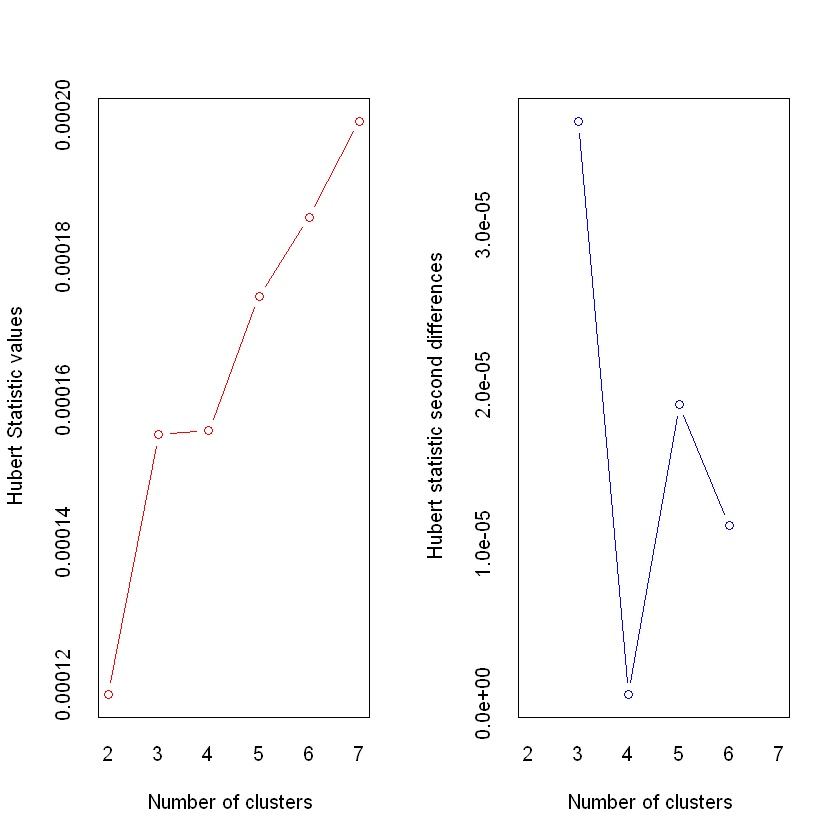

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 13 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 2 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


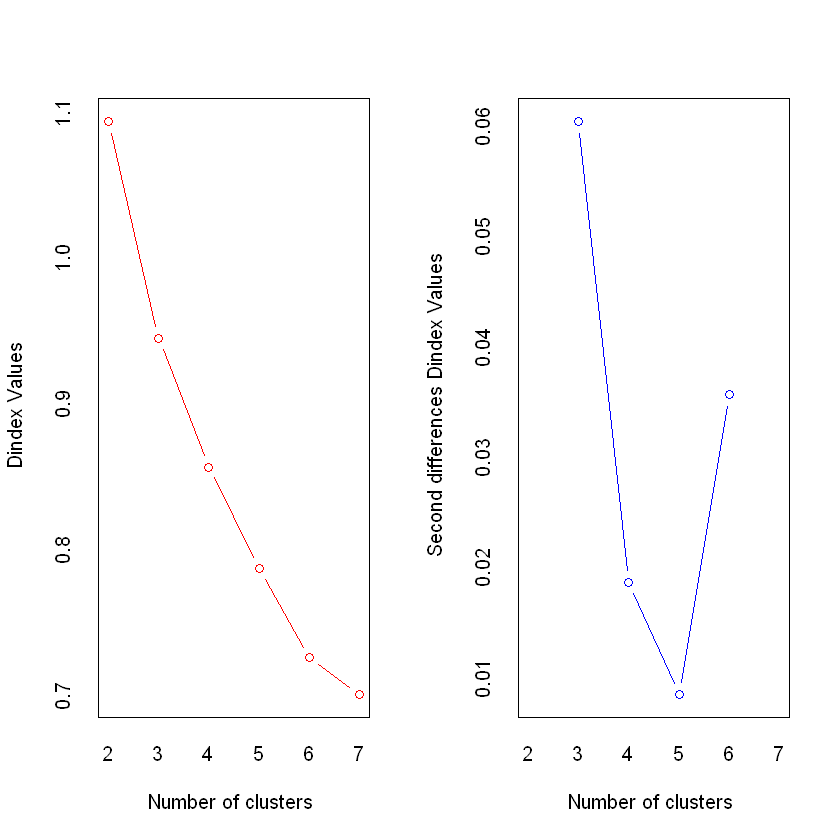

In [77]:
nc <- NbClust(df3, min.nc=2, max.nc=7, method="kmeans")

In [78]:
nc$All.index # estimates for each number of clusters on 26 different metrics of model fit

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,Ptbiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
2,23.1714,4130.053,1282.0140,-10.4844,4465.843,16749872751,4232702.6,5723.611,4.9075,2.0541,...,0.5043,2861.8057,0.5661,0.9398,0.4922,0.0069,1e-04,2.0440,1.0943,1.5870
3,0.9436,3380.870,893.6312,-17.3670,7178.896,18863247168,1521839.4,4312.509,7.0050,2.7263,...,0.4579,1437.5031,0.5522,0.8997,0.8304,0.0024,2e-04,2.3151,0.9456,0.9264
4,1.7068,3065.220,665.1785,-17.6014,9069.965,20700632744,1351310.7,3511.410,8.2412,3.3482,...,0.4186,877.8526,0.5163,0.9420,1.2024,0.0039,2e-04,2.2707,0.8574,0.9143
5,0.2457,2854.978,657.7830,-17.4103,10653.324,21596538856,974594.0,3001.560,9.7772,3.9170,...,0.3858,600.3120,0.4757,0.4498,1.6054,0.0030,2e-04,2.4739,0.7878,0.8482
6,3.7469,2798.569,384.2376,-14.6702,12200.913,20955121240,691962.8,2569.793,11.3800,4.5751,...,0.3608,428.2989,0.4606,0.9938,1.8666,0.0043,2e-04,2.4829,0.7268,0.9559
7,0.7816,2624.456,414.5901,-18.4916,13227.593,21950204438,556915.7,2340.069,12.6184,5.0242,...,0.3382,334.2955,0.4368,0.5626,2.1481,0.0019,2e-04,2.9690,0.7014,0.6305


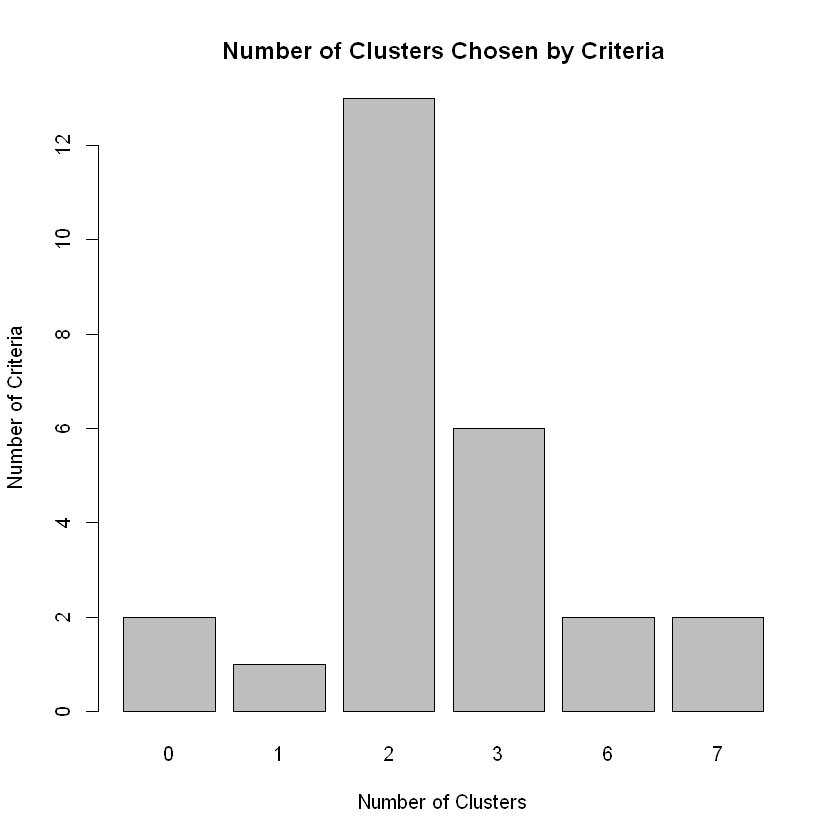

In [79]:
barplot(table(nc$Best.n[1,]), 
        xlab="Number of Clusters", ylab="Number of Criteria",
        main="Number of Clusters Chosen by Criteria")

#### Hierarchical Clustering
Since K-means partitioning is an NPhard problem, an approximate solution is to use multiple random starts of the algorithm and retaining the solution that minimizes the total error sum of squares criterion. A more direct and computer-efficient approach is to first apply Ward’s minimum variance agglomerative clustering to the data, identify the partition of the objects into K groups in the dendrogram, and then use that partition as the starting approximation for Kmeans partitioning 3. Ward’s method: Agglomerative clustering method based on a classical sum-of-squares criterion, producing groups that minimize within-group dispersion.

However, Hierarchical clustering can't handle big data well but K Means clustering can. This is because the time complexity of K Means is linear while that of hierarchical clustering is quadratic. In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering. Moreover, K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D). Limitation with k-Means clustering which requires prior knowledge of no. of clusters we want to divide our data into. But, we can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram.

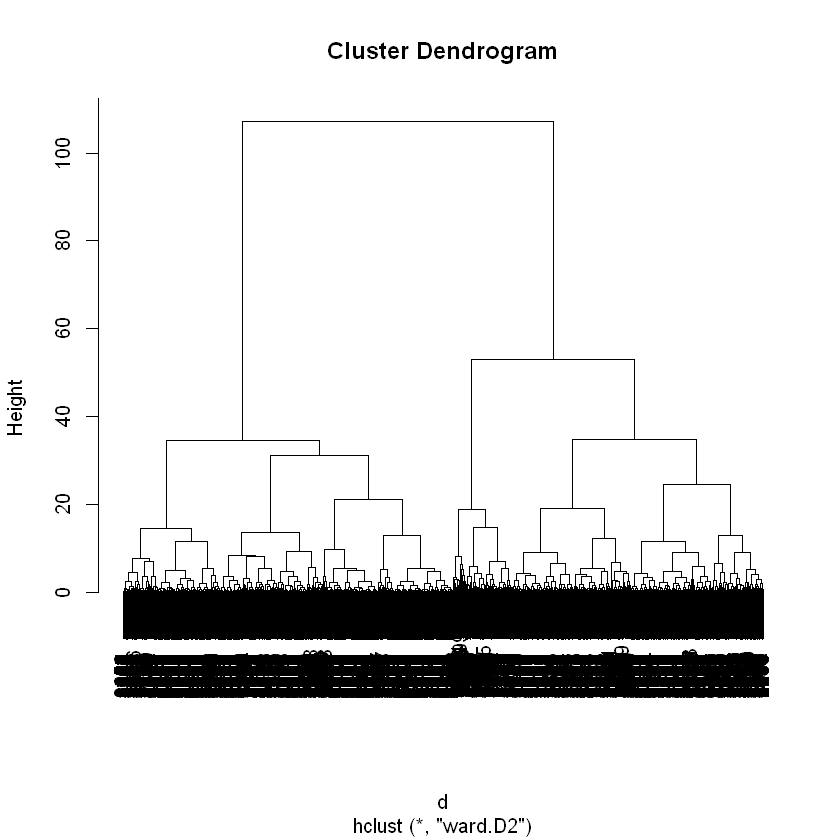

In [80]:
d = dist(df3)
c = hclust(d, method = 'ward.D2')
plot(c)

##### Summary
K-means clustering results are sensitive to the order of objects in the dataset. It is advisable to run the analysis several times, randomizing objects order; average the cluster centres of those runs and input the centres as initial ones for one final run of the analysis. 

The greatest number of indices recommend the 2-cluster solution. 

It is essential for businesses to have a detail understanding about their customers' characteristics, behaviors, demographics, etc. In this context, I have applied different techniques to obtain an insight from existing data. So, with this output it makes sense to show interested stakeholders the cluster solutions and get their input. The decision should be based upon how the business plans to use the results, and the level of granularity they want to see in the clusters.

Now, I export the outputs in CSV files, to read it better.

In [84]:
write.csv(rfm, "values.csv")
write.csv(kmm$cluster, "clusters.csv")